# <center>Topic One: Statistics
---

### Lady Tasting Tea Problem 

The experiment consisted of mixing eight cups of tea, four with milk added first and then tea and four with tea added first and then milk. The lady was presented with the eight cups, assembled in random order, and asked to divide the cups into 2 sets of 4. Can the hypothesis be tested, that the lady can discriminate between the two different types of tea?

### <i>Q: Calculate the minimum number of cups of tea required to ensure the probability of randomly selecting the correct cups is less than or equal to 1%.<i/>

In [11]:
# This has been adapted from Machine Learning & Statistics lecture. 
# The eight cups.
cups = list(range(8))
cups

[0, 1, 2, 3, 4, 5, 6, 7]

In [12]:
(8*7*6*5)/(4*3*2*1)

70.0

In [13]:
import itertools

poss = list(itertools.combinations(cups, 4))
poss

[(0, 1, 2, 3),
 (0, 1, 2, 4),
 (0, 1, 2, 5),
 (0, 1, 2, 6),
 (0, 1, 2, 7),
 (0, 1, 3, 4),
 (0, 1, 3, 5),
 (0, 1, 3, 6),
 (0, 1, 3, 7),
 (0, 1, 4, 5),
 (0, 1, 4, 6),
 (0, 1, 4, 7),
 (0, 1, 5, 6),
 (0, 1, 5, 7),
 (0, 1, 6, 7),
 (0, 2, 3, 4),
 (0, 2, 3, 5),
 (0, 2, 3, 6),
 (0, 2, 3, 7),
 (0, 2, 4, 5),
 (0, 2, 4, 6),
 (0, 2, 4, 7),
 (0, 2, 5, 6),
 (0, 2, 5, 7),
 (0, 2, 6, 7),
 (0, 3, 4, 5),
 (0, 3, 4, 6),
 (0, 3, 4, 7),
 (0, 3, 5, 6),
 (0, 3, 5, 7),
 (0, 3, 6, 7),
 (0, 4, 5, 6),
 (0, 4, 5, 7),
 (0, 4, 6, 7),
 (0, 5, 6, 7),
 (1, 2, 3, 4),
 (1, 2, 3, 5),
 (1, 2, 3, 6),
 (1, 2, 3, 7),
 (1, 2, 4, 5),
 (1, 2, 4, 6),
 (1, 2, 4, 7),
 (1, 2, 5, 6),
 (1, 2, 5, 7),
 (1, 2, 6, 7),
 (1, 3, 4, 5),
 (1, 3, 4, 6),
 (1, 3, 4, 7),
 (1, 3, 5, 6),
 (1, 3, 5, 7),
 (1, 3, 6, 7),
 (1, 4, 5, 6),
 (1, 4, 5, 7),
 (1, 4, 6, 7),
 (1, 5, 6, 7),
 (2, 3, 4, 5),
 (2, 3, 4, 6),
 (2, 3, 4, 7),
 (2, 3, 5, 6),
 (2, 3, 5, 7),
 (2, 3, 6, 7),
 (2, 4, 5, 6),
 (2, 4, 5, 7),
 (2, 4, 6, 7),
 (2, 5, 6, 7),
 (3, 4, 5, 6),
 (3, 4, 5,

In [14]:
import math

In [15]:
math.comb(8, 4)

70

In [16]:
# This outputs a 1.4% chance of selecting the correct cups.
1/(math.comb(8, 4))

0.014285714285714285

In [17]:
# Outputs about half of a percent.
1/(math.comb(10, 4))

0.004761904761904762

In [18]:
# 9 cups of tea gives under one percent whereas 8 outputs over one percent; so the answer is 9 cups of tea. 
1/(math.comb(9, 4))

0.007936507936507936

In [19]:
1 / (math.comb(8, 4))

0.014285714285714285

### <i>Q: How many would be required if you were to let the taster get one cup wrong while maintaining the 1% threshold?<i/>

In [20]:
#Theres is roughly a 20% chance of guessing at least 3 cups correct.
import math
1 / (math.comb(7, 3))

0.02857142857142857

In [21]:
import itertools
cups = [0, 1, 2, 3, 4, 5, 6, 7]
poss = list(itertools.combinations(cups, 3))

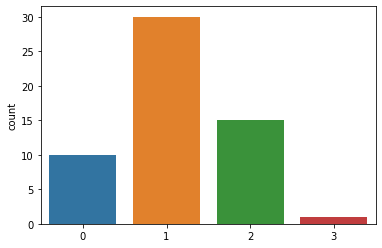

In [22]:
import random
import seaborn as sns

# Pick a random correct answer from the list of 70 to simulate the experiment.
milkfirst = set(random.choice(poss))

# Count the overlap between the correct answer, and each of the 70 possiblities.
counts = [len(milkfirst & set(i)) for i in itertools.combinations(cups, 3)]

# Creat the plot.
sns.countplot(x=counts)

### <i>Q: Use scipy's version of Fisher's exact test to simulate the Lady Tasting Tea problem.<i/>

In [1]:
from scipy.stats import fisher_exact
oddsratio, pvalue = fisher_exact([[4, 0], [0, 4]])
pvalue

0.028571428571428536

The 'oddsratio' outputted from Fisher's exact test usually works on nominal variables with exactly two levels or categories. Nominal variables are usually qualitative, that is can't be assigned a numerical value but they can also be coded with numerical values, but the order is arbitary. The oddsratio compares the of positive occurances with the number of negatives occurances.<br>
<br> Formula: oddsratio, OR = $(a / c)$ / $(b / d)$ <br>
<br> An oddsratio of less than one means negative occurances were more common than positive occurances. An oddsratio equal to one means there is no relation between the variables in question. An oddsratio greater than one means positive cases were more common that negative cases. For example, an oddsration greater than one would mean a higher proportion of the results were as expected than the contrary. 
The 'p-value', the probability value, can be used to determine if you are rejecting the Null Hypothesis. It tells you how often you would expect to see a statistic from a test as or more extreme than the one calculated during your test if the Null Hypothesis of that test was true. 

In [2]:
from scipy.stats import fisher_exact
oddsratio, pvalue = fisher_exact([[3, 1], [1, 3]])
pvalue

0.48571428571428527

In [3]:
#As expected, the probability of her getting all correct is the same as getting all wrong:
from scipy.stats import fisher_exact
oddsratio, pvalue = fisher_exact([[0, 4], [4, 0]])
pvalue

0.028571428571428536

In [4]:
from scipy.stats import fisher_exact
oddsratio, pvalue = fisher_exact([[2, 2], [2, 2]])
pvalue

1.0

In [5]:
import numpy as np
from scipy.stats import hypergeom
table = np.array([[4, 0], [0, 4]])
M = table.sum()
n = table[0].sum()
N = table[:, 0].sum()
start, end = hypergeom.support(M, n, N)
hypergeom.pmf(np.arange(start, end+1), M, n, N)

array([0.01428571, 0.22857143, 0.51428571, 0.22857143, 0.01428571])

At least three out of four correct guesses has a probability of $24%$, which is greater than $5%$. The only time the Null Hypothesis could be rejected was when she correctly guessed all four:<br> $0.014 = 1.4%$ which is less than $5\%$
<br>$0.014 = 1/70, 0.2286 = 16/70$ And: <br>$1/70 + 16/70$ = $17/70$ = $0.24286$  $(24\%)$

### <i>Exercise: Take the code from the Examples section of the scipy stats documentation for independent samples t-tests, add it to your own notebook and add explain how it works using MarkDown cells and code comments. Improve it in any way you think it could be improved</i>

Importing the relevant scipy and numpy packages. Initializing a Random Generator, and setting it to the variable rng. It is similar to the RandomState method but utilizes a BitGenerator to generate the random bits. The default is PCG64:

In [6]:
from scipy import stats
from scipy.stats import norm
import numpy as np
from numpy.random import default_rng
rng = np.random.default_rng()

Is there a 'statisically significant' difference between rvs1 and rvs2? Can the *Null Hypothesis* be rejected, which states there is no statistical difference betweent the means of two samples? Test two samples with identical means. 'loc' specifies the mean. 'scale' specifies the standard deviation. 'random_state' is using an instance of the 'rng' Generator. 'norm' is an instance of the 'rv_continuous' class and inherits the rvs (random variates) method, which returns a random sample with probability equal to the distribution. The 'size' argument specifies the number of elements in the sample:

In [8]:
rvs1 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
rvs2 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
# 'ttest_ind' calculates the T-test for the means of the 2 independent samples:
stats.ttest_ind(rvs1, rvs2)

Ttest_indResult(statistic=0.6012919613609726, pvalue=0.547782090572063)

In [ ]:
#The resulting statistic and pvalue after the code is run:
Ttest_indResult(statistic=-0.4390847099199348, pvalue=0.6606952038870015)
# 'equal_var' set to false performs Welchs T-test which doesn't assume theres an equal population variance:
stats.ttest_ind(rvs1, rvs2, equal_var=False)
Ttest_indResult(statistic=-0.4390847099199348, pvalue=0.6606952553131064)

In [9]:
rvs1 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
rvs2 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
# 'ttest_ind' calculates the T-test for the means of the 2 independent samples:
stats.ttest_ind(rvs1, rvs2)
#print(stats.ttest_ind(rvs1, rvs2)

Ttest_indResult(statistic=-1.9613021410451816, pvalue=0.050121507305302584)

In [10]:
# 'equal_var' set to false performs Welchs T-test which doesn't assume theres an equal population variance:
stats.ttest_ind(rvs1, rvs2, equal_var=False)

Ttest_indResult(statistic=-1.9613021410451814, pvalue=0.050122885106874876)

ttest_ind underestimates p for unequal variances:

In [4]:
rvs3 = stats.norm.rvs(loc=5, scale=20, size=500, random_state=rng)
stats.ttest_ind(rvs1, rvs3)

Ttest_indResult(statistic=-0.9522246837817311, pvalue=0.34121360253963573)

In [5]:
stats.ttest_ind(rvs1, rvs3, equal_var=False)

Ttest_indResult(statistic=-0.9522246837817311, pvalue=0.3413056233865962)

When n1 != n2, the equal variance t-statistic is no longer equal to the unequal variance t-statistic:

In [6]:
rvs4 = stats.norm.rvs(loc=5, scale=20, size=100, random_state=rng)
stats.ttest_ind(rvs1, rvs4)

Ttest_indResult(statistic=1.5475477310467716, pvalue=0.12226025292569571)

In [7]:
stats.ttest_ind(rvs1, rvs4, equal_var=False)
# A different t-statistic and pvalue due to no longer assuming the variance of the samples are equal, which they aren't:

Ttest_indResult(statistic=1.063641616617173, pvalue=0.28979469954694376)

T-test with different means, variance, and n:

In [8]:
rvs5 = stats.norm.rvs(loc=8, scale=20, size=100, random_state=rng)
stats.ttest_ind(rvs1, rvs5)

Ttest_indResult(statistic=-2.7456437577502664, pvalue=0.006220871068802192)

In [9]:
stats.ttest_ind(rvs1, rvs5, equal_var=False)

Ttest_indResult(statistic=-1.8635862697296877, pvalue=0.06503065830368213)

When performing a permutation test, more permutations typically yields more accurate results. The 't distribution' is a probability distribution similar in shape to the bell curve of a 'normal distribution' but contains heavier tails. If no permutations parameter included, the function test uses the 't distribution'. This time a value is given for the permutations parameter.

In [10]:
# Use a np.random.Generator to ensure reproducibility:
stats.ttest_ind(rvs1, rvs5, permutations=2000, random_state=rng)

Ttest_indResult(statistic=-2.7456437577502664, pvalue=0.005497251374312844)

In [12]:
stats.ttest_ind(rvs1, rvs5, permutations=10000,
                random_state=rng)

Ttest_indResult(statistic=-2.7456437577502664, pvalue=0.005499450054994501)

Take these two samples, one of which has an extreme tail.

In [13]:
a = (56, 128.6, 12, 123.8, 64.34, 78, 763.3)
b = (1.1, 2.9, 4.2)

Use the trim keyword to perform a trimmed (Yuen) t-test. For example, using 20% trimming, trim=.2, the test will reduce the impact of one (np.floor(trim * len(a))) element from each tail of sample a. It will have no effect on sample b because (np.floor(trim * len(b)) is 0.

In [33]:
# Demonstrating the above statement:
np.floor(0.2 * len(a))

1.0

In [34]:
np.floor(0.2 * len(b))

0.0

In [15]:
stats.ttest_ind(a, b, trim=.2)

Ttest_indResult(statistic=3.4463884028073513, pvalue=0.01369338726499547)

In [23]:
stats.ttest_ind(a, b, trim=.32)

Ttest_indResult(statistic=2.832256715395378, pvalue=0.04723681941400341)